In [119]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [120]:
drive.mount("drive")

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [121]:
df = pd.read_csv("/content/drive/MyDrive/Course Work/Sem 4/Data Analysis and Visualization/Lab 13/myExpenses1.csv")

In [122]:
df.head()

,Date,Item,Amount,Category,Time,day
0,1/3/2023,chai,7,alone,7:00,Wednesday
1,1/3/2023,chai,20,friend,10:00,Wednesday
2,1/3/2023,juice,15,friend,13:00,Wednesday
3,1/3/2023,rikshow,12,alone,14:00,Wednesday
4,1/3/2023,coffee,12,alone,15:00,Wednesday


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      145 non-null    object
 1   Item      145 non-null    object
 2   Amount    145 non-null    int64 
 3   Category  144 non-null    object
 4   Time      145 non-null    object
 5   day       145 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.9+ KB


## 1. Create a time series plot of daily total expenses. What patterns can you observe?

In [124]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [125]:
daily_expense = df.groupby('Date')['Amount'].sum().reset_index()

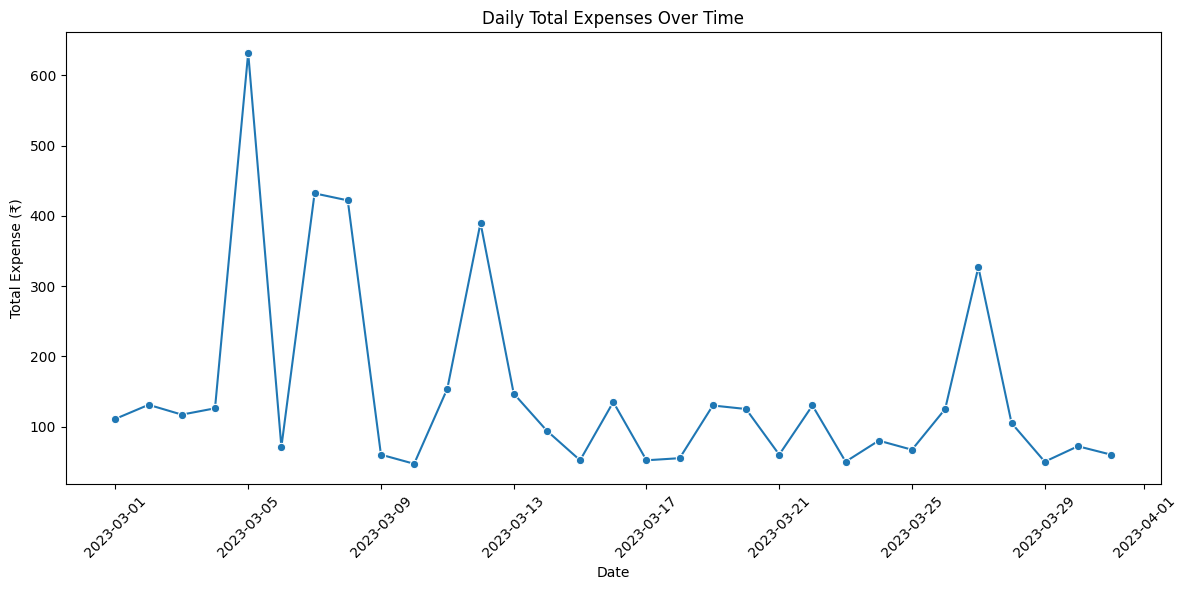

In [126]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_expense, x='Date', y='Amount', marker='o')
plt.title('Daily Total Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Expense (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [127]:
'''
Observations and trends from the plot:-
1. Some dates like 2023-03-05 show relatively higher expenses than the others and the increase in expense is very random and abrupt
2. The expenses are sometimes decreasing between two dates and sometimes increasing but the total plot is non-monotonic (sometimes decreasing and sometimes increasing)
3. Seasonlity can also be observed in the dataset seen in the plot
4. There are no dates on which the spending is 0 and everyday has some kind of spending done
'''

'\nObservations and trends from the plot:-\n1. Some dates like 2023-03-05 show relatively higher expenses than the others and the increase in expense is very random and abrupt \n2. The expenses are sometimes decreasing between two dates and sometimes increasing but the total plot is non-monotonic (sometimes decreasing and sometimes increasing)\n3. Seasonlity can also be observed in the dataset seen in the plot \n4. There are no dates on which the spending is 0 and everyday has some kind of spending done \n'

## 2. Which week had the highest total spending?

In [128]:
df['week'] = df['Date'].dt.isocalendar().week

In [129]:
weekly_spending = df.groupby('week')['Amount'].sum()

In [130]:
max_week = weekly_spending.idxmax()

In [131]:
max_amount = weekly_spending.max()

In [132]:
print(f"Week {max_week} had the highest spending: ₹{max_amount}")

Week 10 had the highest spending: ₹1576


## 3.On which day of the week is spending highest on average?

In [133]:
avg_spending_by_day = df.groupby('day')['Amount'].mean().sort_values(ascending=False)

In [134]:
print(avg_spending_by_day)

day
Sunday       63.850000
Tuesday      36.368421
Monday       31.904762
Wednesday    31.304348
Thursday     22.409091
Saturday     20.100000
Friday       17.800000
Name: Amount, dtype: float64


## 4.Which item is purchased most frequently over time?

In [135]:
most_frequent_item = df['Item'].value_counts().idxmax()

In [136]:
count = df['Item'].value_counts().max()

In [137]:
print(f"The most frequently purchased item is '{most_frequent_item}' with {count} purchases.")

The most frequently purchased item is 'chai with snaks' with 48 purchases.


## 5.What was the total amount spent each day in March 2023 and also find the moving Average?  (use ARIMA)

In [138]:
march_df = df[(df['Date'].dt.month == 3) & (df['Date'].dt.year == 2023)]

In [139]:
march_daily = march_df.groupby('Date')['Amount'].sum()

In [140]:
model = ARIMA(march_daily, order=(0, 1, 1))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [141]:
results = model.fit()

In [142]:
march_daily_ma = results.fittedvalues

In [143]:
march_analysis = pd.DataFrame({'Daily Total': march_daily, 'ARIMA MA': march_daily_ma})

In [144]:
print(march_analysis)

            Daily Total    ARIMA MA
Date                               
2023-03-01          111    0.000000
2023-03-02          131  109.125362
2023-03-03          117  120.091377
2023-03-04          126  119.029179
2023-03-05          632  120.895976
2023-03-06           71  235.780369
2023-03-07          432  203.149203
2023-03-08          422  244.444746
2023-03-09           60  274.356840
2023-03-10           47  240.038576
2023-03-11          154  210.280877
2023-03-12          390  201.845523
2023-03-13          147  229.462657
2023-03-14           94  217.545491
2023-03-15           52  199.896224
2023-03-16          135  178.948874
2023-03-17           52  172.763733
2023-03-18           55  155.848415
2023-03-19          130  141.772277
2023-03-20          125  140.133429
2023-03-21           60  138.030756
2023-03-22          130  127.204626
2023-03-23           50  127.592046
2023-03-24           80  116.846884
2023-03-25           67  111.747243
2023-03-26          125  105

## 6.Create a time series plot of total daily expenses for March 2023.

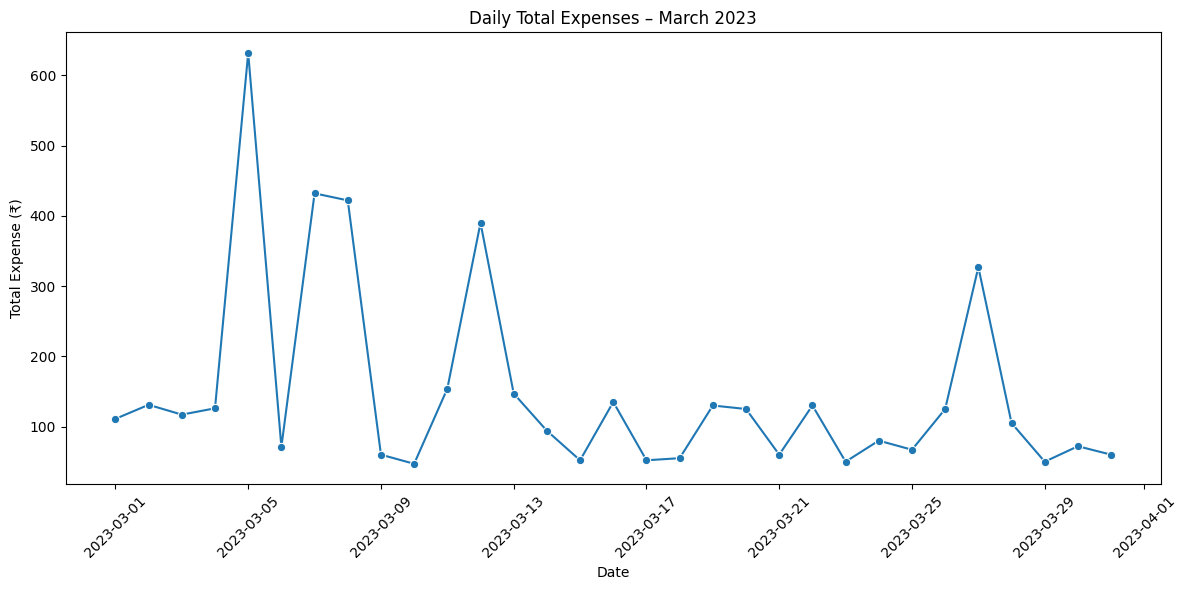

In [145]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=march_analysis, x=march_analysis.index, y='Daily Total', marker='o')
plt.title('Daily Total Expenses – March 2023')
plt.xlabel('Date')
plt.ylabel('Total Expense (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7.Plot the daily expenses with a 3-day and 7-day rolling average. What trend emerges?

In [146]:
march_analysis['3-day MA'] = march_analysis['Daily Total'].rolling(window=3).mean()

In [147]:
march_analysis['7-day MA'] = march_analysis['Daily Total'].rolling(window=7).mean()

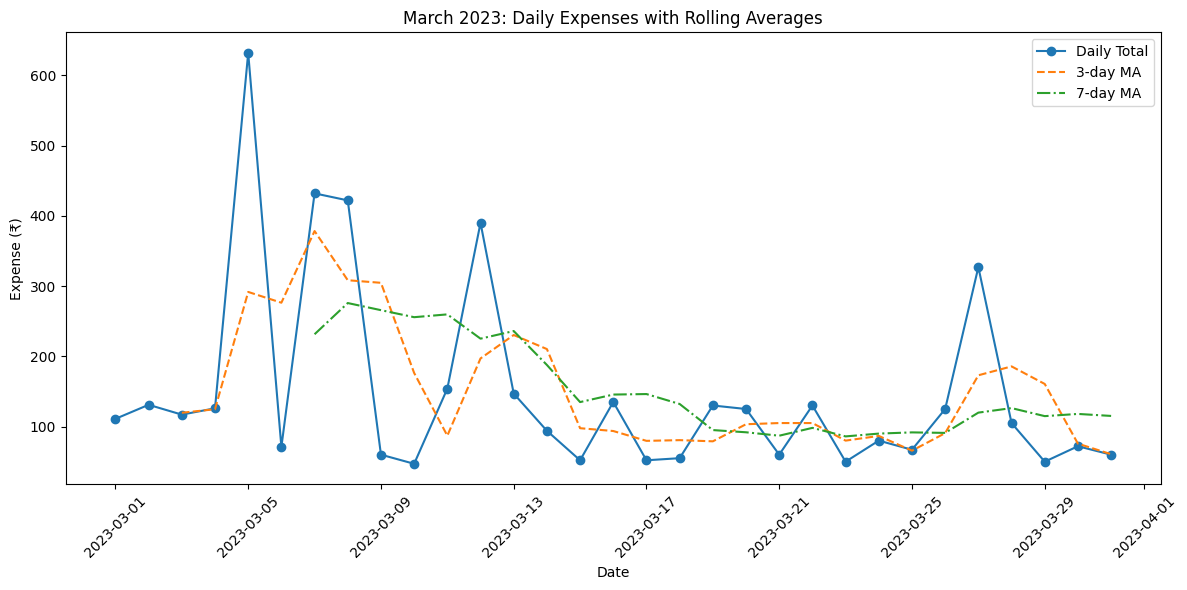

In [148]:
plt.figure(figsize=(12, 6))
plt.plot(march_analysis.index, march_analysis['Daily Total'], label='Daily Total', marker='o')
plt.plot(march_analysis.index, march_analysis['3-day MA'], label='3-day MA', linestyle='--')
plt.plot(march_analysis.index, march_analysis['7-day MA'], label='7-day MA', linestyle='-.')
plt.title('March 2023: Daily Expenses with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Expense (₹)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [149]:
'''
1. 3-day MA smooths short-term spikes
2. 7-day MA shows broader trends
3. Useful for detecting overall rise or fall in spending
'''

'\n1. 3-day MA smooths short-term spikes\n2. 7-day MA shows broader trends\n3. Useful for detecting overall rise or fall in spending\n'

## 8.Check if the daily expense time series in March is stationary using the Augmented Dickey-Fuller (ADF) test. What is the p-value?

In [150]:
adf_result = adfuller(march_analysis['Daily Total'].dropna())

In [151]:
print(f'ADF Statistic: {adf_result[0]}')

ADF Statistic: -2.0648254683724594


In [152]:
print(f'p-value: {adf_result[1]}')

p-value: 0.25889156352524395


In [153]:
'The p-value is greater than 0.05 which means that the series is non-stationary'

'The p-value is greater than 0.05 which means that the series is non-stationary'